In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx


In [2]:
# Importing the dataset
data=pd.read_csv(r'Hackathon_Ideal_Data.csv')

In [3]:
data.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [4]:
# checking for missing values
print(data.isnull().sum())

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64


In [5]:
# Removing any duplicate rows
data=data.drop_duplicates()

In [6]:
# Summary Statistics
data.describe(include='all')

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
count,14260,14260,14260.000000,14260.000000,14260,14260,14260,14260,14260,14260
unique,3,10,NaN,NaN,80,177,242,512,818,1613
top,M2,P8,NaN,NaN,SPICES (03/04),BLENDED,PREMIUM,HINDUSTAN UNILEVER LIMITED,EVEREST,EVEREST
freq,4816,2642,NaN,NaN,1683,1214,793,2307,583,504
mean,NaN,NaN,16.354488,294.455330,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,34.365583,760.129558,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.000000,99.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,16.000000,283.000000,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


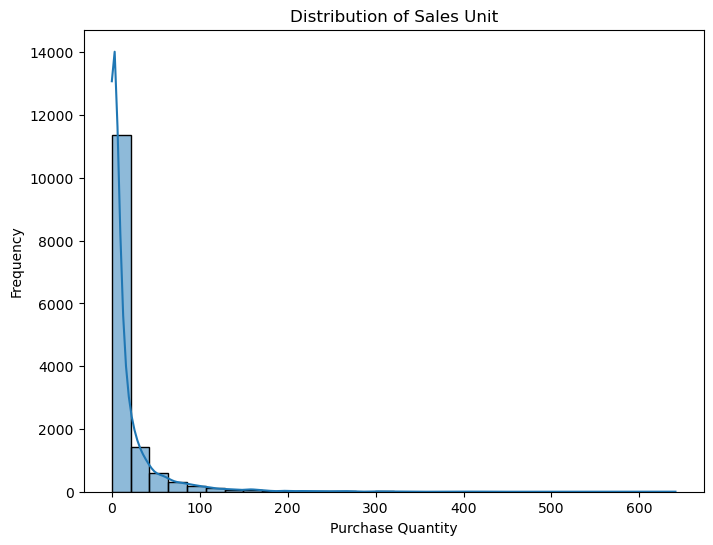

In [7]:
# Visualization of numerical columns
plt.figure(figsize=(8, 6))
sns.histplot(data['QTY'], bins=30, kde=True)
plt.title('Distribution of Sales Unit')
plt.xlabel('Purchase Quantity')
plt.ylabel('Frequency')
plt.show()

C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


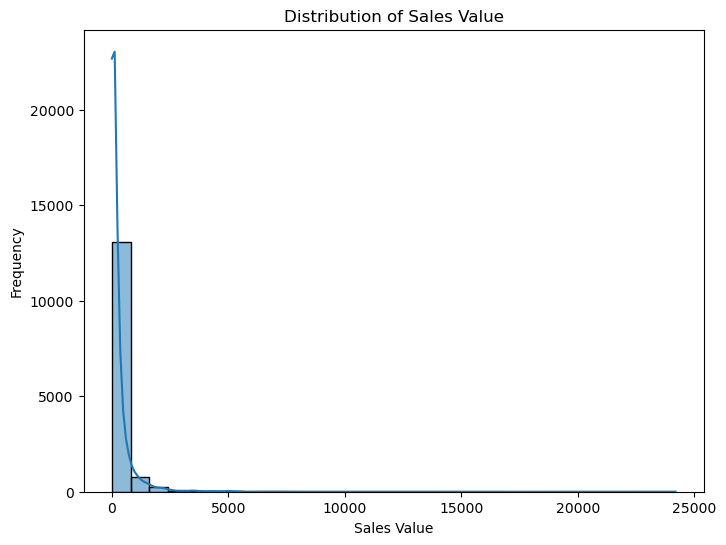

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['VALUE'], bins=30, kde=True)
plt.title('Distribution of Sales Value')
plt.xlabel('Sales Value')
plt.ylabel('Frequency')
plt.show()

C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\princ\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


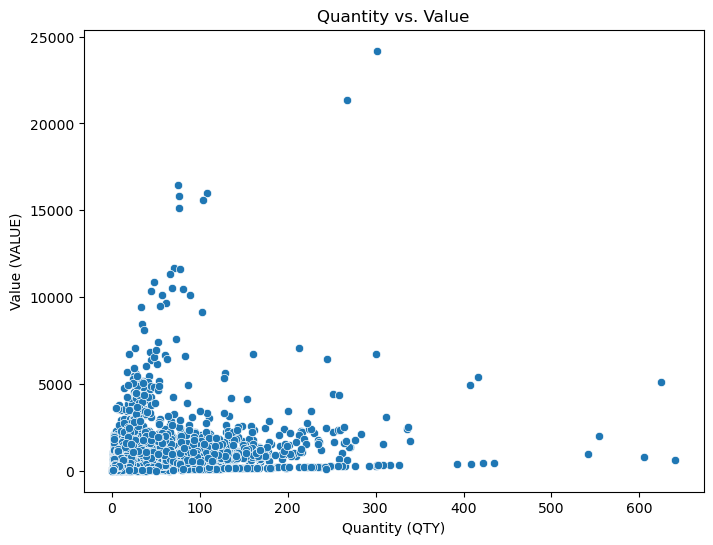

In [9]:
# checking for correlation QTY vs. VALUE

plt.figure(figsize=(8, 6))
sns.scatterplot(x='QTY', y='VALUE', data=data)
plt.title('Quantity vs. Value')
plt.xlabel('Quantity (QTY)')
plt.ylabel('Value (VALUE)')
plt.show()




In [10]:
# Calculating Pearson correlation coefficient

correlation = data['QTY'].corr(data['VALUE'])
print("Correlation between QTY and VALUE:", correlation)

Correlation between QTY and VALUE: 0.3740903048428633


* This shows that Sales Unit and Sales Value has a positive correlation.

In [11]:
# Now for categorical columns

# Analysis by Category
category_sales = data.groupby('GRP').agg({'QTY': 'sum', 'VALUE': 'sum'})


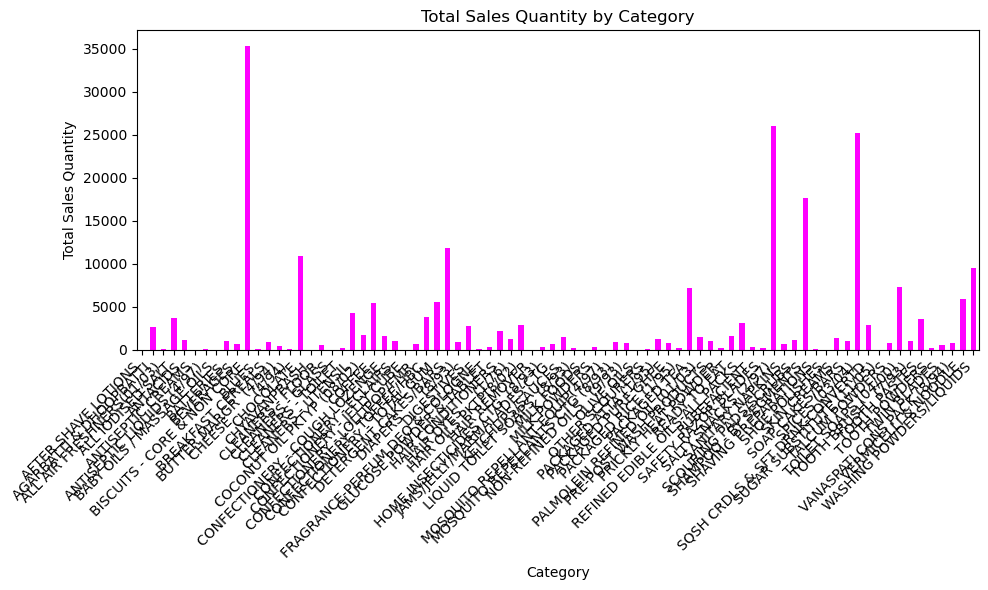

In [12]:
# Plotting total sales quantity by category

plt.figure(figsize=(10, 6))
category_sales['QTY'].plot(kind='bar', color='magenta')
plt.title('Total Sales Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

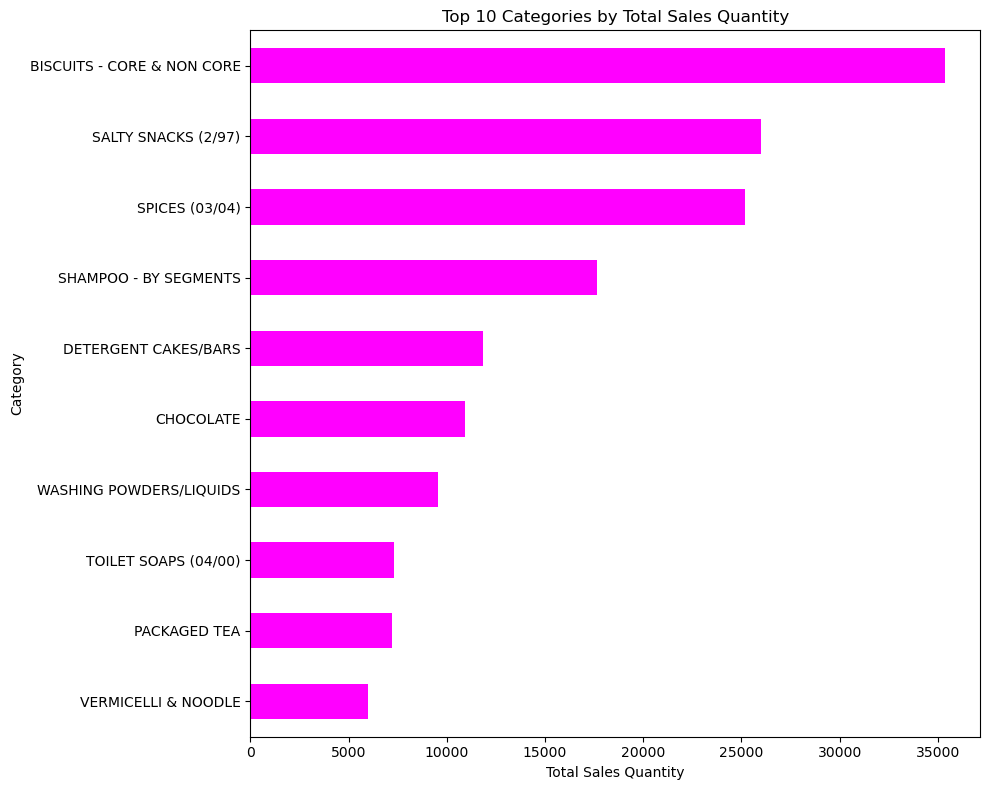

In [13]:
# Selecting top N categories based on sales quantity
top_categories = category_sales.nlargest(10, 'QTY')

# Plotting total sales quantity by category
plt.figure(figsize=(10, 8))
top_categories['QTY'].sort_values().plot(kind='barh', color='magenta')
plt.title('Top 10 Categories by Total Sales Quantity')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

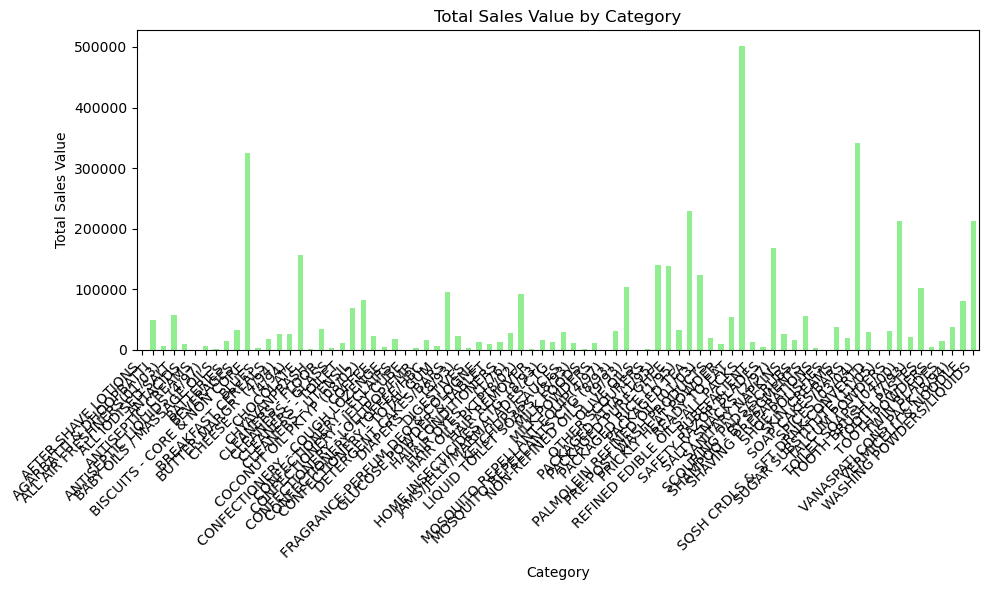

In [14]:
# Plotting total sales value by category

plt.figure(figsize=(10, 6))
category_sales['VALUE'].plot(kind='bar', color='lightgreen')
plt.title('Total Sales Value by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

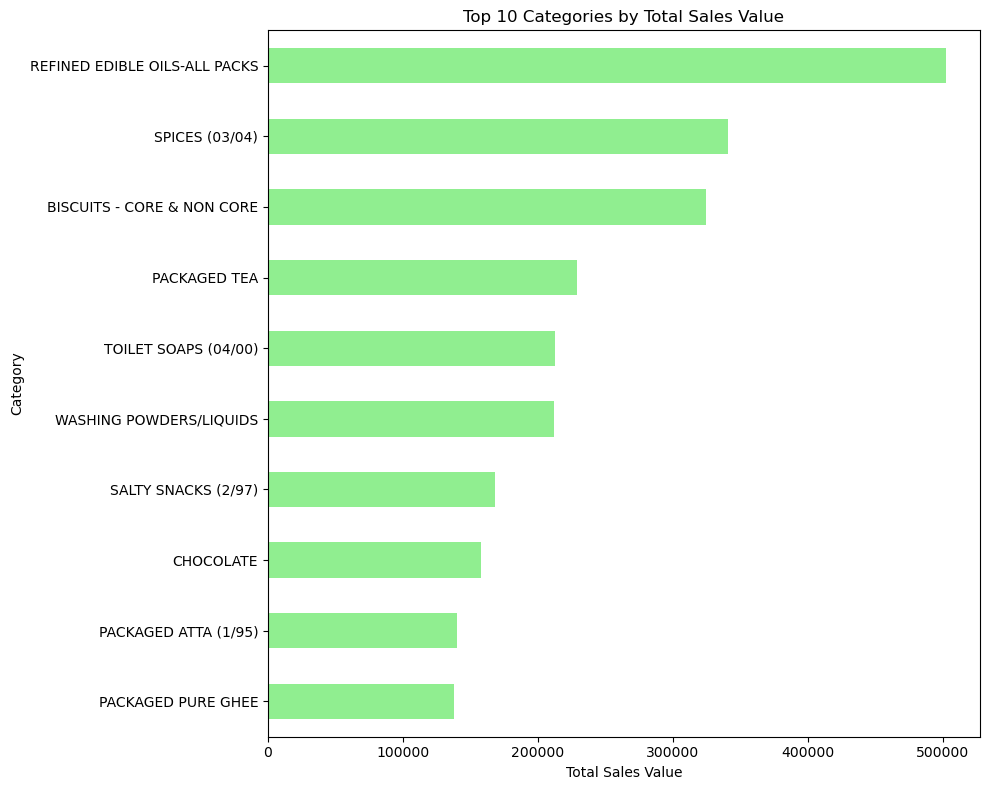

In [15]:
# Selecting top N categories based on total sales value
top_categories_value = category_sales.nlargest(10, 'VALUE')

# Plotting total sales value by category
plt.figure(figsize=(10, 8))
top_categories_value['VALUE'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Top 10 Categories by Total Sales Value')
plt.xlabel('Total Sales Value')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

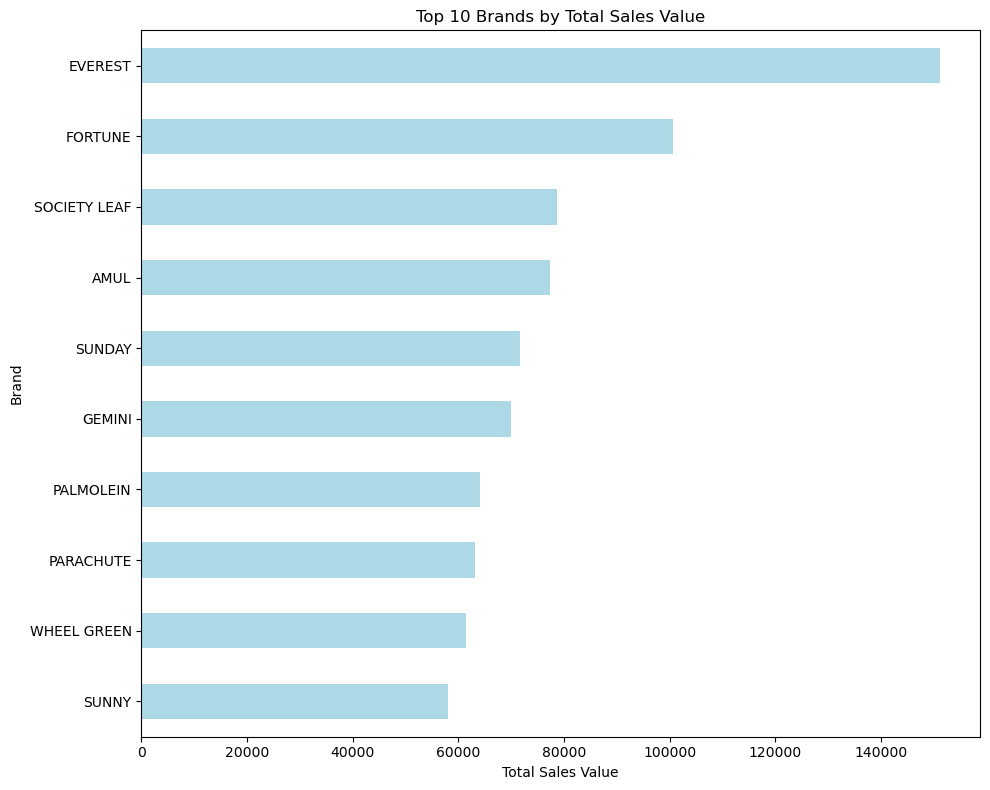

In [16]:
# Analysis by Brand

# Grouping data by brand columns and summing up sales quantity and value
brand_sales = data.groupby('BRD').agg({'QTY': 'sum', 'VALUE': 'sum'})

# Selecting top N brands based on total sales value
top_brands = brand_sales.nlargest(10, 'VALUE')

# Plotting total sales value by brand
plt.figure(figsize=(10, 8))
top_brands['VALUE'].sort_values().plot(kind='barh', color='lightblue')
plt.title('Top 10 Brands by Total Sales Value')
plt.xlabel('Total Sales Value')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

In [ ]:
# Analysis by Company/Manufacturer

# Grouping data by brand columns and summing up sales quantity and value
brand_sales_ = data.groupby('CMP').agg({'QTY': 'sum', 'VALUE': 'sum'})

# Selecting top N brands based on total sales value
top_brands_ = brand_sales_.nlargest(10, 'VALUE')

# Plotting total sales value by brand
plt.figure(figsize=(10, 8))
top_brands_['VALUE'].sort_values().plot(kind='barh', color='blue')
plt.title('Top 10 Brands by Company/Manufacturer')
plt.xlabel('Total Sales Value')
plt.ylabel('Company/Manufacturer')
plt.tight_layout()
plt.show()

In [ ]:
# Analysis by Stores
# Grouping data by store code and summing up sales quantity and value
store_sales = data.groupby('STORECODE').agg({'QTY': 'sum', 'VALUE': 'sum'})

# Plotting total sales quantity by store
plt.figure(figsize=(10, 8))
plt.bar(store_sales.index, store_sales['QTY'], color='lightpink')
plt.title('Total Sales Quantity by Store')
plt.xlabel('Store Code')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Plotting total sales value by store
plt.figure(figsize=(10, 8))
plt.bar(store_sales.index, store_sales['VALUE'], color='lightgreen')
plt.title('Total Sales Value by Store')
plt.xlabel('Store Code')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Recency, Frequency, and Monetary values
recency = data.groupby(['MONTH', 'STORECODE', 'BRD'])['MONTH'].transform('count')
frequency = data.groupby(['MONTH', 'STORECODE', 'BRD'])['STORECODE'].transform('count')
monetary = data['VALUE']

# Create RFM dataframe
rfm_df = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

# RFM scoring
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], q=5, labels=False, duplicates='drop') + 1
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'], q=5, labels=False, duplicates='drop') + 1
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=False, duplicates='drop') + 1

# RFM segment
rfm_df['RFM_segment'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)

# Summary statistics for RFM segments
rfm_summary = rfm_df.groupby('RFM_segment').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean', 'R_score': 'mean', 'F_score': 'mean', 'M_score': 'mean'}).reset_index()

# Display RFM segments and summary statistics
print(rfm_summary)


In [ ]:
def segment_rfm(row):
    if row['R_score'] >= 4 and row['F_score'] >= 4 and row['M_score'] >= 4:
        return 'High Value Customers'
    elif row['R_score'] <= 2 and row['F_score'] >= 4 and row['M_score'] >= 4:
        return 'Loyal Customers'
    elif row['R_score'] >= 3 and row['F_score'] >= 3 and row['M_score'] >= 3:
        return 'Potential Loyalists'
    elif row['R_score'] <= 2 and row['F_score'] <= 2 and row['M_score'] >= 3:
        return 'New Customers'
    elif row['R_score'] >= 4 and row['F_score'] >= 4 and row['M_score'] <= 2:
        return 'At Risk Customers'
    elif row['R_score'] <= 2 and row['F_score'] >= 4 and row['M_score'] <= 2:
        return 'Churned Customers'
    else:
        return 'Standard Customers'

# Apply segmentation function to create RFM segments
rfm_df['RFM_segment'] = rfm_df.apply(segment_rfm, axis=1)

# Summary statistics for RFM segments
segment_summary = rfm_df.groupby('RFM_segment').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean'}).reset_index()

# Display segment summary statistics
print(segment_summary)


* Insights for New Customers:- 
Onboarding Process: Implement an effective onboarding process to engage new customers and encourage repeat purchases.- 
Welcome Offers: Offer special promotions or discounts to incentivize new customers to make additional purchases- .
Product Recommendations: Provide personalized product recommendations based on the customer's initial purchase to encourage exploration of oth      er offering- s.
Feedback Collection: Collect feedback from new customers to understand their experience and improve service quali- ty.
Engagement Campaigns: Implement targeted email campaigns or social media engagement strategies to keep new customers informed about product updates and promotstrategies.

* Insights for Standard Customers:
- Retention Strategies: Implement customer retention programs to maintain engagement and encourage repeat purchases.
- Segmentation Refinement: Further segment standard customers based on additional criteria such as product preferences or purchase frequency to tailor marketing efforts more effectively.
- Loyalty Programs: Introduce loyalty programs or rewards schemes to incentivize standard customers to increase their spending or frequency of purchases.
- Upselling and Cross-selling: Identify opportunities for upselling or cross-selling complementary products to standard customers based on their purchase history.
- Customer Engagement Channels: Determine the most effective communication channels (e.g., email, SMS, social media) for engaging with standard customers and optimizing outreach strategies.

In [ ]:
# Sales Analysis
# Aggregate data by month
monthly_sales = data.groupby('MONTH').agg({'QTY': 'sum', 'VALUE': 'sum'}).reset_index()

# Visualize monthly sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['MONTH'], monthly_sales['QTY'], marker='o', linestyle='-')
plt.title('Monthly Sales Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['MONTH'], monthly_sales['VALUE'], marker='o', linestyle='-')
plt.title('Monthly Sales Value Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Association Analysis

# Create transactional records
transactions = data.groupby(['MONTH', 'STORECODE'])['BRD'].apply(list).reset_index()

# Count co-occurrences of items within transactions
item_counts = {}
for items in transactions['BRD']:
    for item1 in items:
        for item2 in items:
            if item1 != item2:
                pair = tuple(sorted([item1, item2]))
                if pair in item_counts:
                    item_counts[pair] += 1
                else:
                    item_counts[pair] = 1

# Identify frequent item pairs (associations)
frequent_pairs = {pair: count for pair, count in item_counts.items() if count > 1}



In [ ]:
# Sort associations by count (descending order)
sorted_associations = sorted(frequent_pairs.items(), key=lambda x: x[1], reverse=True)

# Display the top associations
top_associations = sorted_associations[:10]  # Display top 10 associations
for pair, count in top_associations:
    print(f"Items: {pair}, Count: {count}")

In [ ]:


    
# Extract item pairs and counts for visualization
item_pairs = [str(pair) for pair in top_associations]  # Convert pairs to strings
counts = [count for _, count in top_associations]  # Extract counts

# Create a bar plot to visualize the top associations
plt.figure(figsize=(10, 6))
plt.barh(item_pairs, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Item Pairs')
plt.title('Top Associations')
plt.gca().invert_yaxis()  # Invert y-axis to display top associations at the top
plt.show()


In [ ]:
# Exporting RFM analysis results to CSV
rfm_df.to_csv('rfm_analysis.csv', index=False)

import csv

with open('frequent_item_pairs.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Item Pair', 'Count'])
    for pair, count in frequent_pairs.items():
        writer.writerow([str(pair), count])
